In [1]:
# my practice project 1
# p.shyam kishore | kishore.officialmail938@gmail.com | +91 9381300344

In [2]:
#let import usefull libraries 
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [3]:
dt = pd.read_csv(r'C:\data_trained\DSData-master\DSData-master\winequality-red.csv')
dt.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [4]:
dt.columns.to_list()

['fixed acidity',
 'volatile acidity',
 'citric acid',
 'residual sugar',
 'chlorides',
 'free sulfur dioxide',
 'total sulfur dioxide',
 'density',
 'pH',
 'sulphates',
 'alcohol',
 'quality']

In [5]:
dt.columns = ['fixed_acidity', 'volatile_acidity', 'citric_acid', 'residual_sugar',
       'chlorides', 'free_sulfur_dioxide', 'total_sulfur_dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'quality']

#### In our case quality is the label and it is a classification model.lets deal with null values if present

In [6]:
dt.isnull().sum()

fixed_acidity           0
volatile_acidity        0
citric_acid             0
residual_sugar          0
chlorides               0
free_sulfur_dioxide     0
total_sulfur_dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

In [7]:
dt.describe()

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


In [8]:
dt.shape[1]

12

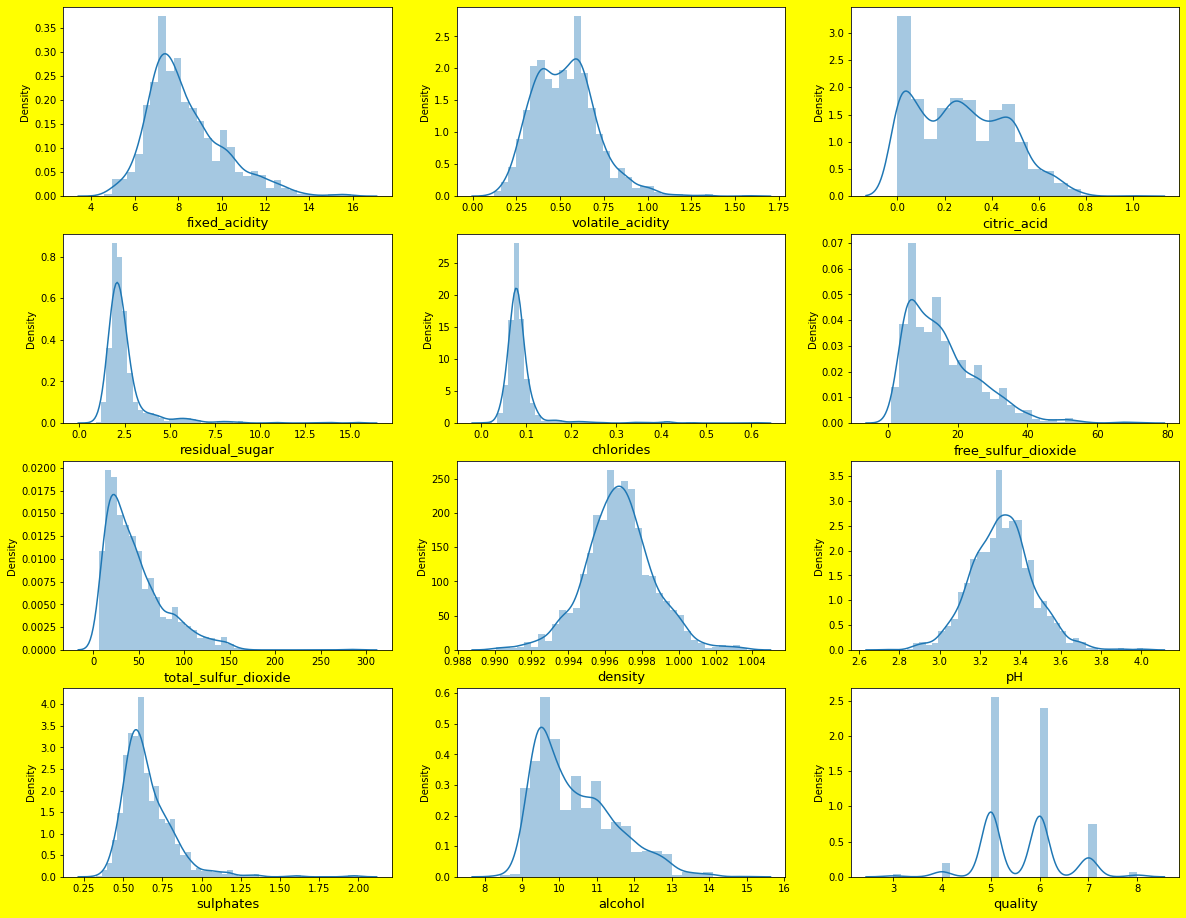

In [9]:
plt.figure(figsize=(20,16),facecolor='yellow')
plt_num = 1
for i in dt:
    if plt_num<=12:
        ax=plt.subplot(4,3,plt_num)
        sns.distplot(dt[i])
        plt.xlabel(i,fontsize=13)
    plt_num+=1
plt.show()

In [10]:
dt['citric_acid'].replace(0,dt['citric_acid'].mean(),inplace=True)

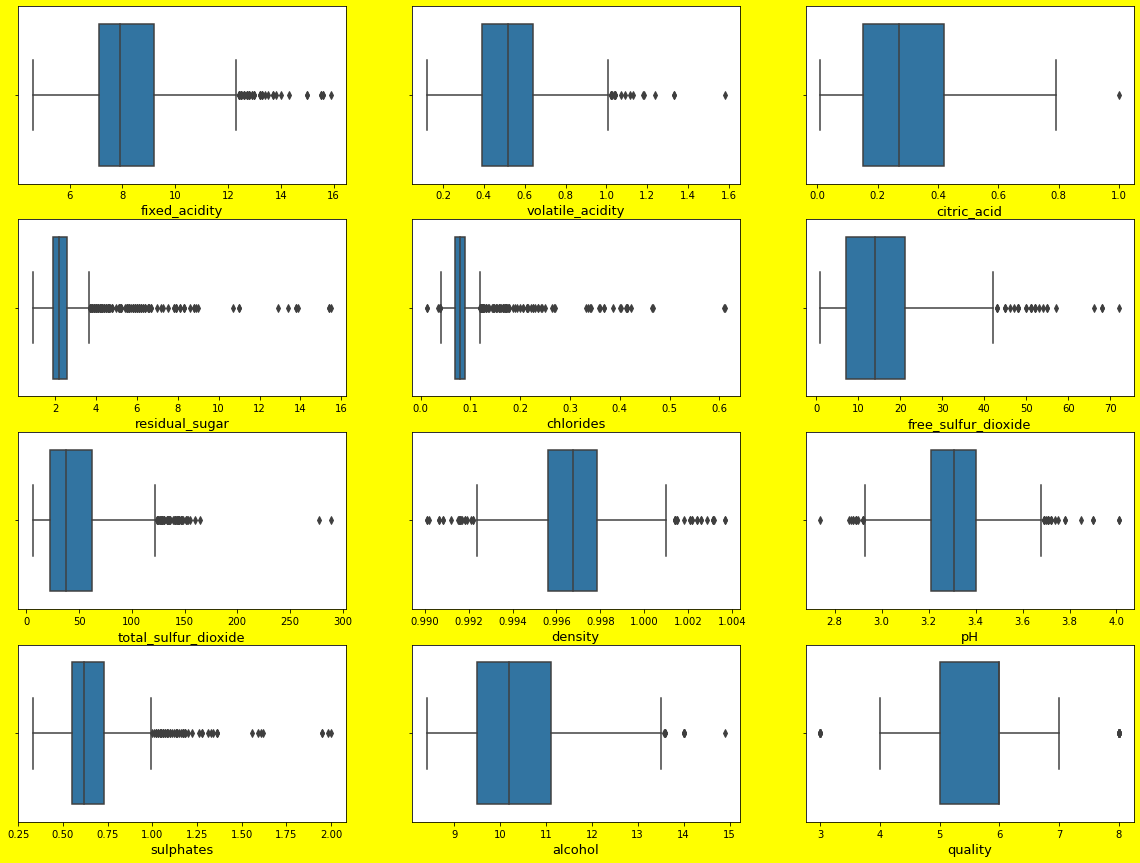

In [11]:
#visualize the outlies using box plot
plt.figure(figsize=(20,15),facecolor='yellow')
plt_num = 1
for i in dt:
    if plt_num<=12:
        ax=plt.subplot(4,3,plt_num)
        sns.boxplot(dt[i])
        plt.xlabel(i,fontsize=13)
    plt_num+=1
plt.show()

In [12]:
dt.shape

(1599, 12)

In [13]:
#find IQR
#1st quantile
q1=dt.quantile(0.25)
#3rd quantile
q3 = dt.quantile(0.75)
iqr=q3-q1

In [14]:
dt.head()

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.270976,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.270976,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.040000,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.560000,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.270976,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [15]:
dt.shape

(1599, 12)

#### dealing with higher uotlers

In [16]:
dt.columns

Index(['fixed_acidity', 'volatile_acidity', 'citric_acid', 'residual_sugar',
       'chlorides', 'free_sulfur_dioxide', 'total_sulfur_dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'quality'],
      dtype='object')

In [17]:
re_high = (q3.residual_sugar + 1.5 * iqr.residual_sugar)
index = np.where(dt['residual_sugar'] > re_high)
dt.drop(dt.index[index])
dt.reset_index()

,index,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol,quality
0,0,7.4,0.700,0.270976,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
1,1,7.8,0.880,0.270976,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5
2,2,7.8,0.760,0.040000,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5
3,3,11.2,0.280,0.560000,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6
4,4,7.4,0.700,0.270976,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1594,1594,6.2,0.600,0.080000,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5
1595,1595,5.9,0.550,0.100000,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6
1596,1596,6.3,0.510,0.130000,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6
1597,1597,5.9,0.645,0.120000,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5


In [18]:
ch_high = (q3.chlorides + 1.5 * iqr.chlorides)
index = np.where(dt['chlorides'] > ch_high)
dt.drop(dt.index[index])
dt = dt.reset_index(drop=True)


In [19]:
dt.shape

(1599, 12)

In [20]:
fre_high = (q3.free_sulfur_dioxide + 1.5 *iqr.free_sulfur_dioxide)
index = np.where(dt['free_sulfur_dioxide'] > fre_high)
dt.drop(dt.index[index])
dt = dt.reset_index(drop=True)

In [21]:
dt.shape

(1599, 12)

In [22]:
tsd_high = (q3.total_sulfur_dioxide + 1.5 *iqr.total_sulfur_dioxide)
index = np.where(dt['total_sulfur_dioxide'] > tsd_high)
dt.drop(dt.index[index])
dt.reset_index(drop=True)

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.700,0.270976,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
1,7.8,0.880,0.270976,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5
2,7.8,0.760,0.040000,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5
3,11.2,0.280,0.560000,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6
4,7.4,0.700,0.270976,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
...,...,...,...,...,...,...,...,...,...,...,...,...
1594,6.2,0.600,0.080000,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5
1595,5.9,0.550,0.100000,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6
1596,6.3,0.510,0.130000,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6
1597,5.9,0.645,0.120000,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5


### I tried to drop Outliers lets check data again

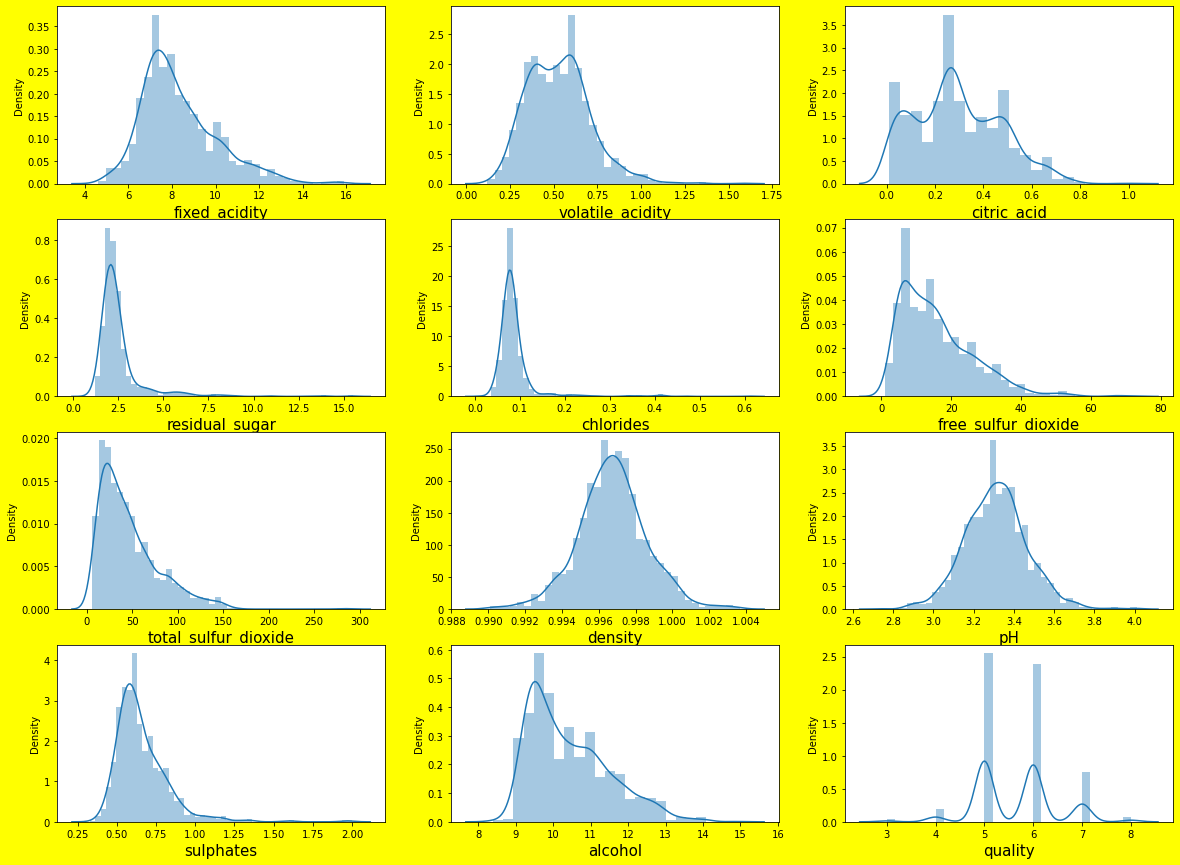

In [23]:
#visualize the outlies using box plot
plt.figure(figsize=(20,15),facecolor='yellow')
plt_num = 1
for i in dt:
    if plt_num<=12:
        ax=plt.subplot(4,3,plt_num)
        sns.distplot(dt[i])
        plt.xlabel(i,fontsize=15)
    plt_num+=1
plt.show()

In [24]:
x=dt.drop(columns=['quality'])
y=dt['quality']

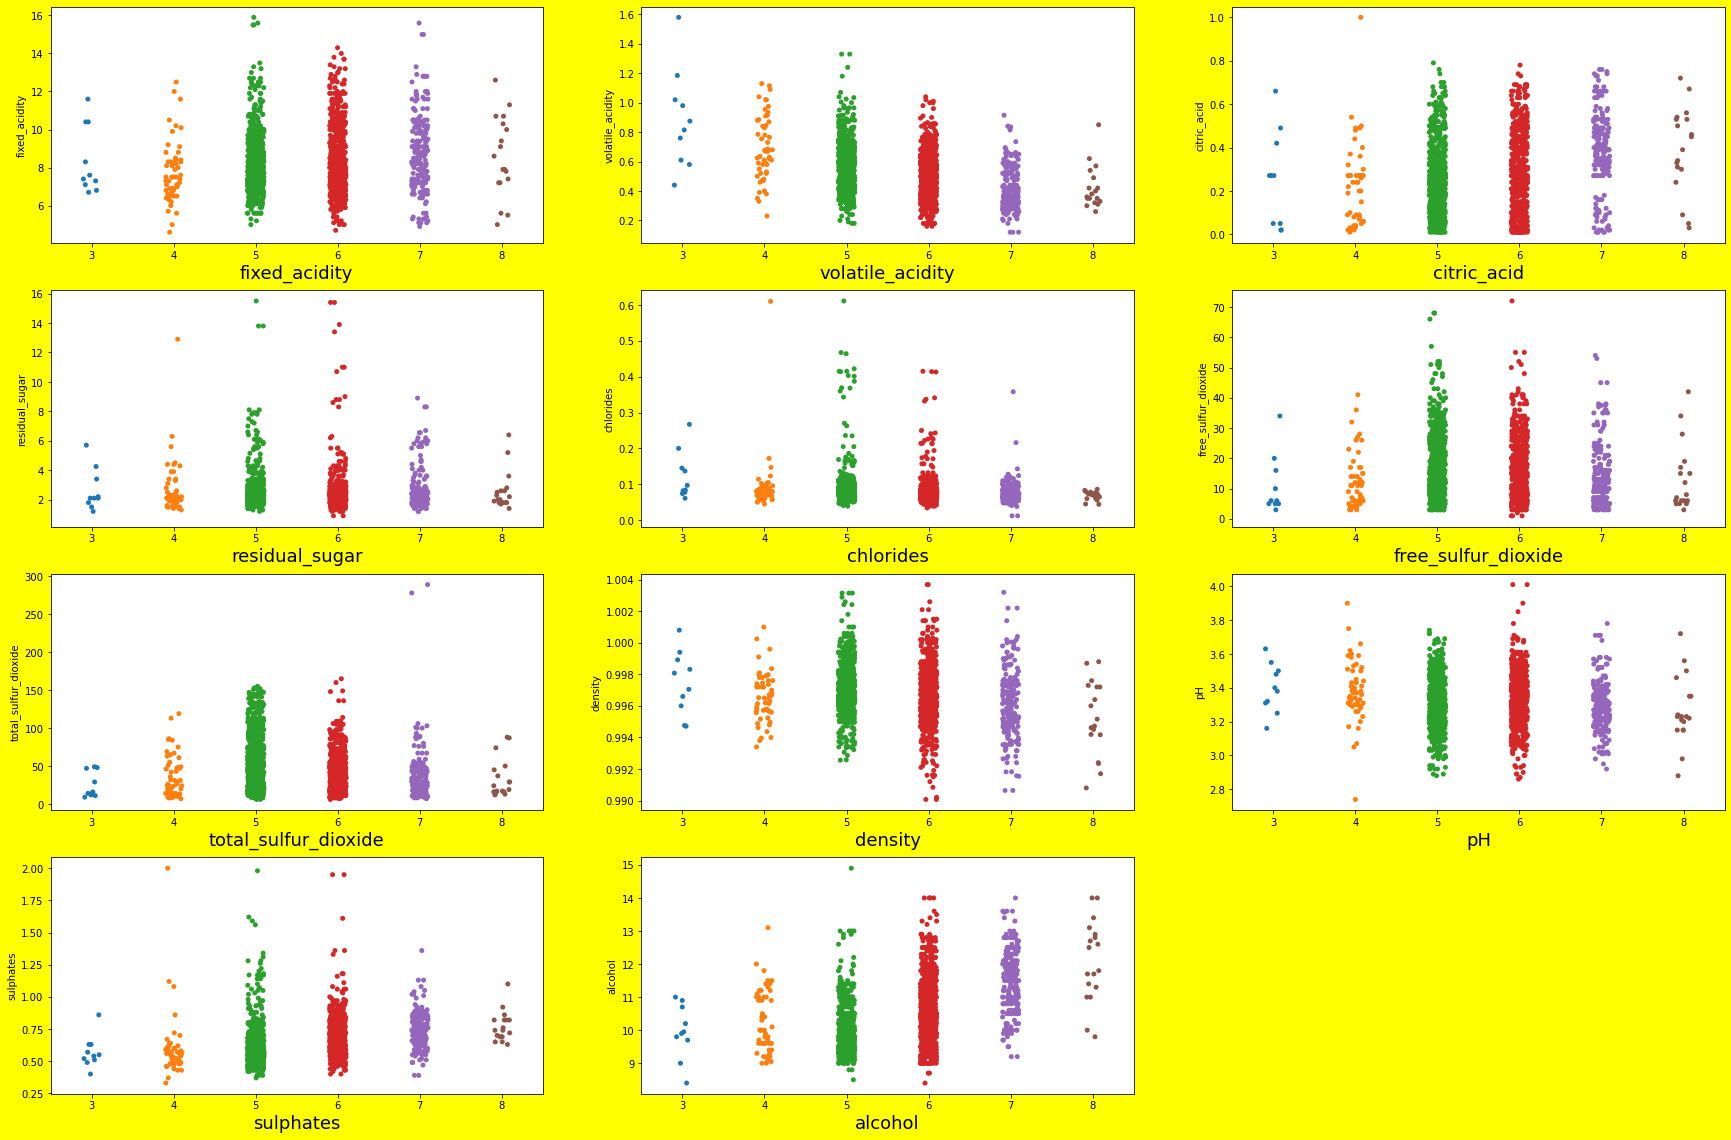

In [25]:
plt.figure(figsize=(30,20),facecolor='yellow')
plt_num = 1
for i in x:
    if plt_num<=12:
        ax=plt.subplot(4,3,plt_num)
        sns.stripplot(y,x[i])
        plt.xlabel(i,fontsize=18)
    plt_num+=1
plt.show()

<AxesSubplot:>

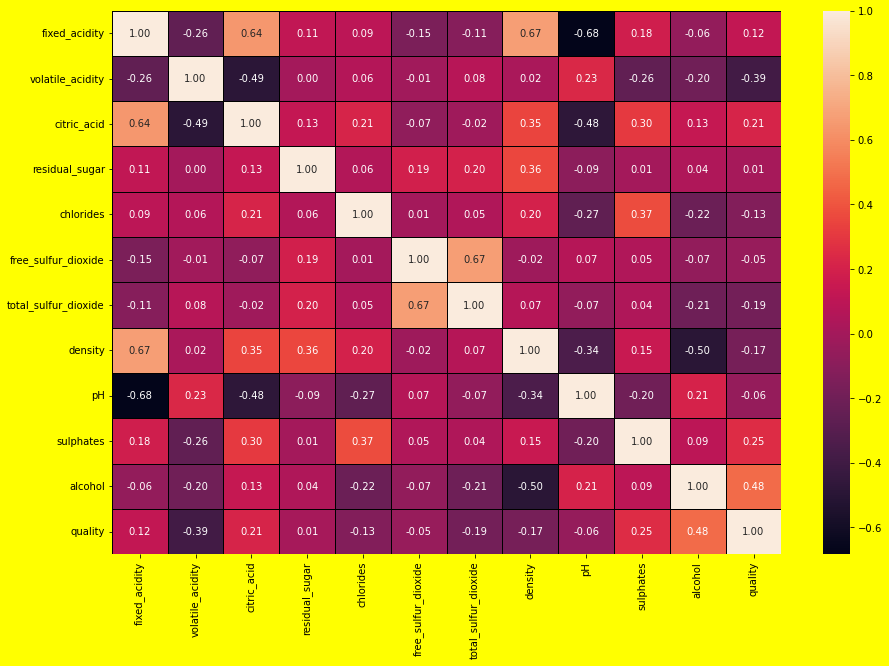

In [26]:
plt.figure(figsize=(15,10),facecolor='yellow')
sns.heatmap(dt.corr(),annot=True,linewidths=0.5,linecolor='black',fmt='.2f')

In [27]:
x.shape

(1599, 11)

In [28]:
dt.drop(columns=['residual_sugar'],inplace=True)

In [30]:
dt.skew()

fixed_acidity           0.982751
volatile_acidity        0.671593
citric_acid             0.338008
chlorides               5.680347
free_sulfur_dioxide     1.250567
total_sulfur_dioxide    1.515531
density                 0.071288
pH                      0.193683
sulphates               2.428672
alcohol                 0.860829
quality                 0.217802
dtype: float64

In [31]:
from scipy.stats import zscore
z = np.abs(zscore(x))
z.shape

(1599, 11)

In [32]:
threshold = 3
print(np.where(z>3))

(array([  13,   14,   15,   15,   17,   17,   19,   33,   38,   42,   43,
         45,   57,   81,   81,   83,   86,   88,   91,   92,   95,  106,
        106,  109,  120,  126,  127,  142,  144,  147,  151,  151,  151,
        151,  163,  164,  169,  169,  181,  199,  226,  226,  240,  243,
        244,  258,  258,  274,  281,  291,  324,  325,  339,  340,  347,
        354,  374,  381,  391,  396,  396,  400,  400,  442,  442,  451,
        467,  480,  480,  494,  515,  544,  554,  554,  555,  555,  557,
        557,  568,  584,  588,  591,  595,  608,  614,  636,  639,  649,
        649,  651,  652,  652,  652,  672,  672,  684,  690,  692,  692,
        695,  723,  724,  730,  754,  776,  777,  795,  821,  836,  837,
        889,  911,  917,  923,  925,  926,  982, 1017, 1018, 1043, 1051,
       1051, 1071, 1074, 1079, 1079, 1081, 1081, 1111, 1114, 1131, 1154,
       1165, 1175, 1186, 1231, 1235, 1244, 1244, 1244, 1260, 1269, 1269,
       1270, 1270, 1288, 1289, 1295, 1296, 1299, 1

In [34]:
dt1 = dt[(z<3).all(axis=1)]
print(x.shape)

(1599, 11)


In [35]:
dt1.shape

(1458, 11)

In [37]:
dt1.columns

Index(['fixed_acidity', 'volatile_acidity', 'citric_acid', 'chlorides',
       'free_sulfur_dioxide', 'total_sulfur_dioxide', 'density', 'pH',
       'sulphates', 'alcohol', 'quality'],
      dtype='object')

In [38]:
x=dt1.drop(columns=['quality'])
y=dt1['quality']

In [40]:
print(x.shape)
print(y.shape)

(1458, 10)
(1458,)


In [41]:
from sklearn.preprocessing import power_transform
x= power_transform(x,method='yeo-johnson')
x


array([[-0.46910218,  1.04577542, -0.0127093 , ...,  1.35995444,
        -0.58823037, -1.11232895],
       [-0.17212704,  1.90240432, -0.0127093 , ..., -0.81842137,
         0.45352708, -0.52685366],
       [-0.17212704,  1.34481498, -1.5269718 , ..., -0.38286787,
         0.22198916, -0.52685366],
       ...,
       [-1.45195519, -0.00716591, -0.89346746, ...,  0.74543779,
         0.9322481 ,  0.7428399 ],
       [-1.88631136,  0.75846579, -0.96084774, ...,  1.76196223,
         0.66861292, -0.03320546],
       [-1.77310975, -1.3354534 ,  1.0507478 , ...,  0.53744195,
         0.30109116,  0.7428399 ]])

In [42]:
y.value_counts()

5    617
6    586
7    185
4     47
8     16
3      7
Name: quality, dtype: int64

In [43]:
#oversampling the data
from imblearn.over_sampling import SMOTE
sm = SMOTE()
x,y = sm.fit_resample(x,y)

In [44]:
y.value_counts()

5    617
6    617
7    617
4    617
8    617
3    617
Name: quality, dtype: int64

### model building

In [45]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier,ExtraTreesClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import GradientBoostingClassifier,AdaBoostClassifier,BaggingClassifier
from sklearn.metrics import classification_report,confusion_matrix,roc_curve,accuracy_score
from sklearn.model_selection import cross_val_score

In [46]:
def metric_score(clf,x_train,x_test,y_train,y_test,train=True):
    if train:
        y_pred = clf.predict(x_train)
        print(f'training data accoracy score:{accuracy_score(y_train,y_pred)*100:.2f}%')
    elif train==False:
              pred = clf.predict(x_test)
              print(f'test data accoracy score:{accuracy_score(y_test,pred)*100:.2f}%')
              print('\n confusion matrics \n',confusion_matrix(y_test,pred))
              print('\n classification report \n',classification_report(y_test,pred,digits=2))

In [70]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.30,random_state =900)

In [71]:
rf = RandomForestClassifier()
rf.fit(x_train,y_train)

RandomForestClassifier()

In [72]:
metric_score(rf,x_train,x_test,y_train,y_test,train=True)
metric_score(rf,x_train,x_test,y_train,y_test,train=False)

training data accoracy score:100.00%
test data accoracy score:88.84%

 confusion matrics 
 [[194   0   0   0   0   0]
 [  0 187   7   0   0   0]
 [  6   9 147  22   2   0]
 [  5   4  37 126  16   3]
 [  0   1   1   9 180   2]
 [  0   0   0   0   0 153]]

 classification report 
               precision    recall  f1-score   support

           3       0.95      1.00      0.97       194
           4       0.93      0.96      0.95       194
           5       0.77      0.79      0.78       186
           6       0.80      0.66      0.72       191
           7       0.91      0.93      0.92       193
           8       0.97      1.00      0.98       153

    accuracy                           0.89      1111
   macro avg       0.89      0.89      0.89      1111
weighted avg       0.89      0.89      0.89      1111



In [73]:
lr = LogisticRegression()
lr.fit(x_train,y_train)

LogisticRegression()

In [74]:
metric_score(lr,x_train,x_test,y_train,y_test,train=True)
metric_score(lr,x_train,x_test,y_train,y_test,train=False)

training data accoracy score:63.80%
test data accoracy score:61.12%

 confusion matrics 
 [[194   0   0   0   0   0]
 [ 14 123  33  20   3   1]
 [ 22  38  89  33   4   0]
 [ 12  15  46  59  44  15]
 [  1   3   3  30  93  63]
 [  0   0   0   0  32 121]]

 classification report 
               precision    recall  f1-score   support

           3       0.80      1.00      0.89       194
           4       0.69      0.63      0.66       194
           5       0.52      0.48      0.50       186
           6       0.42      0.31      0.35       191
           7       0.53      0.48      0.50       193
           8       0.60      0.79      0.69       153

    accuracy                           0.61      1111
   macro avg       0.59      0.62      0.60      1111
weighted avg       0.59      0.61      0.60      1111



In [75]:
ada = AdaBoostClassifier()
ada.fit(x_train,y_train)

AdaBoostClassifier()

In [76]:
metric_score(ada,x_train,x_test,y_train,y_test,train=True)
metric_score(ada,x_train,x_test,y_train,y_test,train=False)

training data accoracy score:32.65%
test data accoracy score:33.93%

 confusion matrics 
 [[191   0   0   0   3   0]
 [133   0   1   4  55   1]
 [146   0  14  11  13   2]
 [ 98   0   8  24  39  22]
 [ 26   0   4  20  64  79]
 [  0   0   0  17  52  84]]

 classification report 
               precision    recall  f1-score   support

           3       0.32      0.98      0.48       194
           4       0.00      0.00      0.00       194
           5       0.52      0.08      0.13       186
           6       0.32      0.13      0.18       191
           7       0.28      0.33      0.31       193
           8       0.45      0.55      0.49       153

    accuracy                           0.34      1111
   macro avg       0.31      0.34      0.27      1111
weighted avg       0.31      0.34      0.26      1111



In [77]:
bc = BaggingClassifier()
bc.fit(x_train,y_train)

BaggingClassifier()

In [78]:
metric_score(bc,x_train,x_test,y_train,y_test,train=True)
metric_score(bc,x_train,x_test,y_train,y_test,train=False)

training data accoracy score:99.11%
test data accoracy score:85.51%

 confusion matrics 
 [[192   0   2   0   0   0]
 [  4 179   7   4   0   0]
 [  4  10 147  23   1   1]
 [  6   7  40 111  20   7]
 [  0   2   6  12 168   5]
 [  0   0   0   0   0 153]]

 classification report 
               precision    recall  f1-score   support

           3       0.93      0.99      0.96       194
           4       0.90      0.92      0.91       194
           5       0.73      0.79      0.76       186
           6       0.74      0.58      0.65       191
           7       0.89      0.87      0.88       193
           8       0.92      1.00      0.96       153

    accuracy                           0.86      1111
   macro avg       0.85      0.86      0.85      1111
weighted avg       0.85      0.86      0.85      1111



In [79]:
et = ExtraTreesClassifier()
et.fit(x_train,y_train)

ExtraTreesClassifier()

In [80]:
metric_score(bc,x_train,x_test,y_train,y_test,train=True)
metric_score(bc,x_train,x_test,y_train,y_test,train=False)

training data accoracy score:99.11%
test data accoracy score:85.51%

 confusion matrics 
 [[192   0   2   0   0   0]
 [  4 179   7   4   0   0]
 [  4  10 147  23   1   1]
 [  6   7  40 111  20   7]
 [  0   2   6  12 168   5]
 [  0   0   0   0   0 153]]

 classification report 
               precision    recall  f1-score   support

           3       0.93      0.99      0.96       194
           4       0.90      0.92      0.91       194
           5       0.73      0.79      0.76       186
           6       0.74      0.58      0.65       191
           7       0.89      0.87      0.88       193
           8       0.92      1.00      0.96       153

    accuracy                           0.86      1111
   macro avg       0.85      0.86      0.85      1111
weighted avg       0.85      0.86      0.85      1111



In [81]:
#cross validation scores
from sklearn.model_selection import cross_val_score

In [82]:
def scores(clf,x,y):
    print(f'cross_validation scores for {clf} are {cross_val_score(clf,x,y)} \n mean of the scores is {cross_val_score(clf,x,y).mean()}\n','*'*50)

In [83]:
scores(rf,x,y)
scores(lr,x,y)
scores(ada,x,y)
scores(bc,x,y)
scores(et,x,y)

cross_validation scores for RandomForestClassifier() are [0.81241565 0.81241565 0.79459459 0.82972973 0.84864865] 
 mean of the scores is 0.8238851807272859
 **************************************************
cross_validation scores for LogisticRegression() are [0.59784076 0.5708502  0.59594595 0.61081081 0.5972973 ] 
 mean of the scores is 0.5945490024437392
 **************************************************
cross_validation scores for AdaBoostClassifier() are [0.35897436 0.35762483 0.31756757 0.31756757 0.31081081] 
 mean of the scores is 0.33250902724586934
 **************************************************
cross_validation scores for BaggingClassifier() are [0.79622132 0.76518219 0.78378378 0.81081081 0.82162162] 
 mean of the scores is 0.7955166502534923
 **************************************************
cross_validation scores for ExtraTreesClassifier() are [0.83265857 0.80836707 0.81756757 0.83918919 0.83783784] 
 mean of the scores is 0.8287467629572893
 ********************

In [84]:
accuracy = []
cvs = []
dif=[]
clfs = [rf,lr,ada,bc,et]
for i in clfs:
    i.fit(x_train,y_train)
    predi = i.predict(x_test)
    accuracy.append(accuracy_score(y_test,predi))
    cvs.append(cross_val_score(i,x,y).mean())
    dif.append(accuracy_score(y_test,predi)-cross_val_score(i,x,y).mean())
comparison = pd.DataFrame()
comparison['clasifier']=['rf','lr','ada','bc','et']
comparison['accuracy']=accuracy
comparison['cv_score']=cvs
comparison['difference']=dif
comparison

,clasifier,accuracy,cv_score,difference
0,rf,0.880288,0.816322,0.060725
1,lr,0.611161,0.594549,0.016612
2,ada,0.339334,0.332509,0.006825
3,bc,0.841584,0.795250,0.045255
4,et,0.890189,0.836850,0.063872


In [95]:
Final_model = ExtraTreesClassifier()
Final_model.fit(x_train,y_train)

ExtraTreesClassifier()

# it seems ETClassifier has best accuracy score with 89.01%

In [96]:
#saving the model
import joblib
joblib.dump(Final_model,'wine_quality')

['wine_quality']

In [97]:
#pridicting the saved model
model2 = joblib.load('diabetes.pkl')
prediction = model2.predict(x_test)
prediction

array([3, 5, 3, ..., 4, 5, 7], dtype=int64)

### conclusion

In [98]:
a=np.array(y_test)
predicted = np.array(prediction)
df_conclusion = pd.DataFrame({'original':a,'predicted':predicted})
df_conclusion

,original,predicted
0,3,3
1,5,5
2,3,3
3,5,5
4,8,8
...,...,...
1106,7,7
1107,8,8
1108,4,4
1109,5,5


# Successfully achived 89% acuracy score using my model